# Prevendo o preço do aluguel em São Paulo

Quais são os melhores imóveis no RJ para investir
- Objetivo: Prever qual seria o valor do aluguel dos imóveis usando dados do QuintoAndar, para saber quais imóveis vão trazer um retorno mais rápido do investimento

In [188]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# importando a base de dados
base = pd.read_csv('data/quinto_andar_transformed_data.csv')

In [190]:
# Visualizando as primeiras linhas da base de dados
base.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


In [191]:
# Olhando as informações da base de dados, os tipos dos dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


In [192]:
# Contando quantos dados são nulos em cada coluna
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

### Limpeza dos dados

In [193]:
# Filtrando os condominios nulos
base[base['condominio'].isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Acessando as url podemos ver que se tratam de casas, onde o valor do condominio deveria ser 0

In [194]:
# Substituindo valores nulos por 0 na coluna condominio
base['condominio'] = base.condominio.fillna(0)

In [195]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2775 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


In [196]:
# Acessando onde o iptu é nulo
base[base['iptu'].isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [197]:
# Excluindo as LINHAS com iptu com valor nulo
base = base.dropna(axis=0)

In [198]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2767 non-null   object 
 1   bairro           2767 non-null   object 
 2   aluguel          2767 non-null   float64
 3   condominio       2767 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2767 non-null   float64
 6   taxa_serviço     2767 non-null   float64
 7   total            2767 non-null   float64
 8   metragem         2767 non-null   float64
 9   quarto           2767 non-null   float64
 10  banheiro         2767 non-null   float64
 11  vaga_carro       2767 non-null   float64
 12  andar            2767 non-null   float64
 13  aceita_pet       2767 non-null   float64
 14  mobilia          2767 non-null   float64
 15  metro_prox       2767 non-null   float64
dtypes: float64(14), object(2)
memory usage: 367.5+ KB


In [199]:
# Removendo a coluna url, por não ser mais útil para o modelo
base = base.drop('url', axis=1)

In [200]:
# Verificando se a coluna url foi apagada
base.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


### Análise exploratória

In [201]:
# Usando describe para ver os valores das colunas númericas, valor minimo, maximo, média, mediana
base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


Analisando a coluna aluguel, podemos ver que a média dos valores é 2.276 e a mediana 1.950<br>
O menor valor de aluguel é 500 e o maior 11.250. E o desvio padrão 1.327

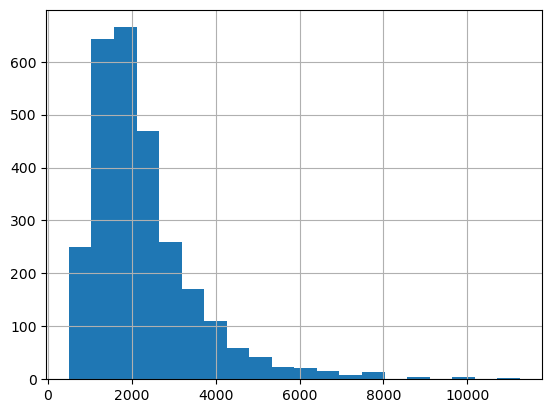

In [202]:
# Verificando histograma com os valores dos alugueis
base.aluguel.hist(bins=20);

In [203]:
# Analisando o top 10 alugueis mais caros
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


Assim podemos notar que existem valores duplicados, como por exemplo os registros: 235 e 2305 possuem as mesmas informações<br>
Assim como 2723 e 1402/ e 255 e 2311.

In [204]:
# Removendo valores duplicados
base[base.duplicated()]
base = base.drop_duplicates(keep='last')

In [205]:
# Verificando novamente o top 10 alugueis mais caros
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0
1505,Jardim Paulista,9000.0,2480.0,496.0,115.0,180.0,12270.0,160.0,3.0,4.0,1.0,7.0,1.0,0.0,1.0
2047,Vila Olímpia,8999.0,2300.0,616.0,115.0,179.0,12210.0,128.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0
680,Jardim Paulista,8990.0,1362.0,352.0,114.0,179.0,11000.0,140.0,2.0,3.0,1.0,19.0,1.0,0.0,1.0


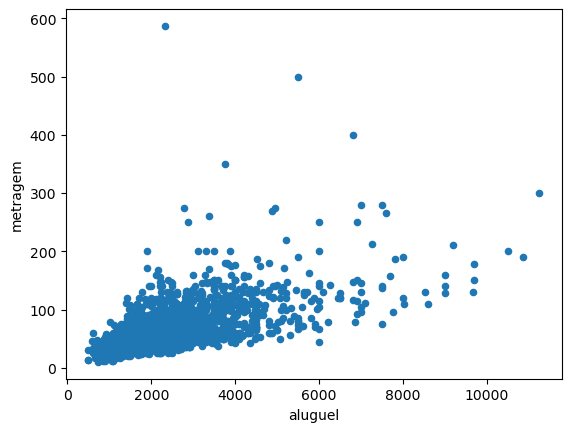

In [206]:
# Criando um scatterplot do preço com aluguel e sua metragem
base.plot.scatter(x='aluguel', y='metragem');

Adicionando as regiões dos bairros na base de dados

In [207]:
regioes = pd.read_excel("data/bairros.xlsx")
regioes.head()

,Bairro,Região
0,Sé,Centro
1,Bela Vista,Centro
2,Bom Retiro,Centro
3,Cambuci,Centro
4,Consolação,Centro


In [208]:
# Juntando as duas bases com how=left para pegar todas infos da primeira base
# left_on e right_on são as colunas que serão usadas de lógica para mesclagem
base2 = pd.merge(
    base,
    regioes,
    how='left',
    left_on='bairro', right_on='Bairro'
)

In [209]:
base2.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro
3,Ipiranga,1600.0,0.0,142.0,27.0,32.0,1801.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Ipiranga,Sul
4,Vila Olímpia,1700.0,1106.0,218.0,22.0,34.0,3080.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Vila Olímpia,Sul


In [210]:
# verificando se tem regiao nula
base2[base2['Região'].isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
234,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,NaN
820,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1262,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
1684,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
1845,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,NaN
2227,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [211]:
# Substituindo o valor nulo na Região por Norte
base2.loc[base2.Região.isnull(), 'Região'] = 'Norte'

In [212]:
# Removendo o espaço que aparece no nome vila maria
base2.loc[base2.bairro == "Vila Maria ", 'bairro'] = "Vila Maria"

In [213]:
# verificando se tem regiao nula
base2[base2['Região'].isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


<AxesSubplot:xlabel='aluguel', ylabel='Região'>

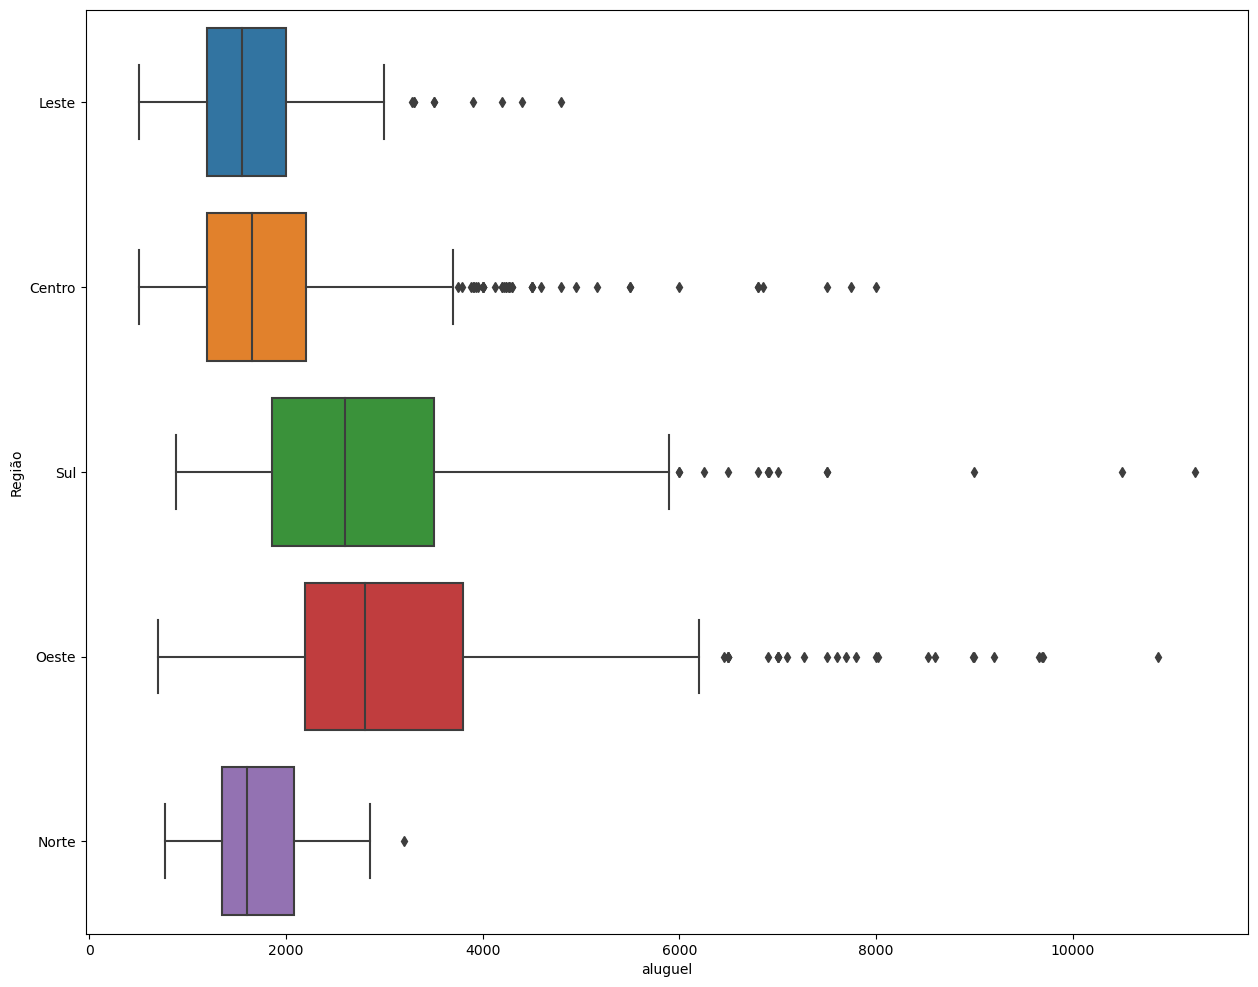

In [214]:
# Criando um gráfico de aluguel e região

fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x='aluguel', y='Região', data=base2, orient='h')

In [215]:
# usando a Função corr para análisar que colunas mais influenciam no valor do aluguel
# Quanto mais proximo de 1 mais influencia

base.corr()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.550408,0.029749,0.986454,0.999937,0.177739,0.631508,0.542106,0.652628,0.568855,0.107412,0.094566,0.193138,-0.129323
condominio,0.550408,1.000000,-0.022528,0.480795,0.550166,0.086858,0.407340,0.414063,0.519895,0.564992,0.238754,0.072480,0.117128,-0.011455
iptu,0.029749,-0.022528,1.000000,0.045256,0.029894,0.988381,0.054971,0.075771,0.058030,-0.011821,-0.026144,0.012635,-0.010256,0.011303
seguro_incendio,0.986454,0.480795,0.045256,1.000000,0.986431,0.188593,0.668635,0.556595,0.651139,0.562684,0.062299,0.095892,0.179715,-0.142988
taxa_serviço,0.999937,0.550166,0.029894,0.986431,1.000000,0.177864,0.631660,0.542528,0.652482,0.569054,0.107077,0.095338,0.192725,-0.129804
total,0.177739,0.086858,0.988381,0.188593,0.177864,1.000000,0.150305,0.159710,0.160433,0.082810,-0.002683,0.027208,0.019025,-0.005686
metragem,0.631508,0.407340,0.054971,0.668635,0.631660,0.150305,1.000000,0.722085,0.667849,0.453350,-0.065775,0.142592,-0.049050,-0.159904
quarto,0.542106,0.414063,0.075771,0.556595,0.542528,0.159710,0.722085,1.000000,0.667134,0.454178,-0.020671,0.120889,-0.091733,-0.210637
banheiro,0.652628,0.519895,0.058030,0.651139,0.652482,0.160433,0.667849,0.667134,1.000000,0.519699,0.034894,0.082991,-0.012027,-0.152591
vaga_carro,0.568855,0.564992,-0.011821,0.562684,0.569054,0.082810,0.453350,0.454178,0.519699,1.000000,0.183451,0.071695,0.112209,-0.158004


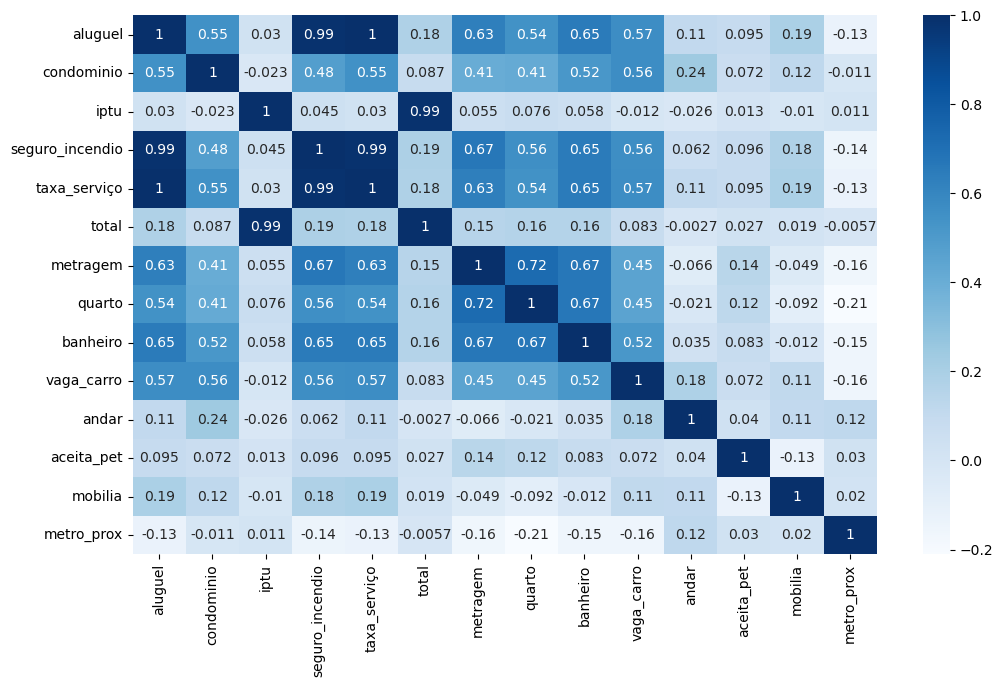

In [216]:
#Criando um heatmap para análisar a correlação das variaveis
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(base.corr(),annot=True, cmap='Blues')
plt.show()

Analisando assim podemos ver que o valor do seguro_incendio e taxa_servico são sem dúvidas os que mais influenciam com 99% e 98%<br>
Já o terceiro seriam o número de banheiros com 65%, só então a metragem com 63%

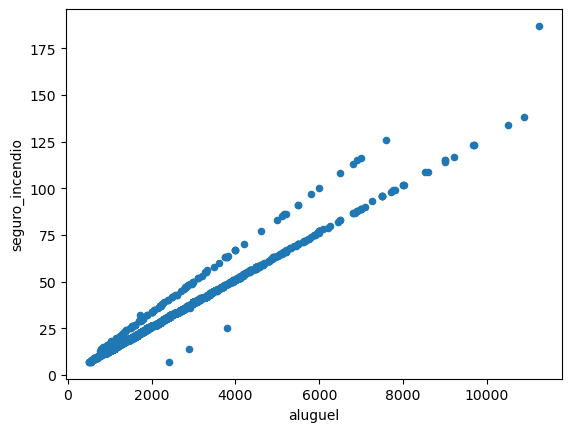

In [217]:
# Criando um scatterplot do preço com aluguel e seguro_incendio
base.plot.scatter(x='aluguel', y='seguro_incendio');

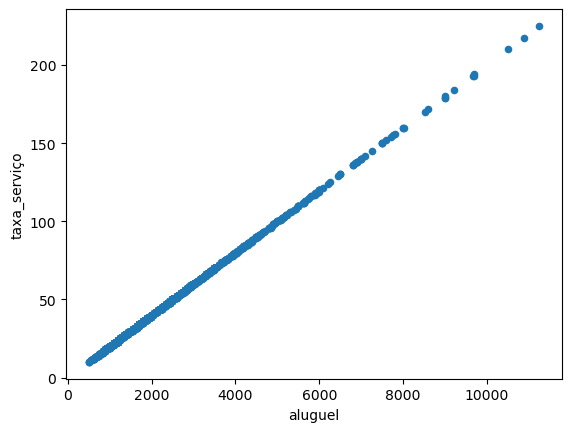

In [218]:
# Criando um scatterplot do preço com aluguel e taxa_serviço
base.plot.scatter(x='aluguel', y='taxa_serviço');

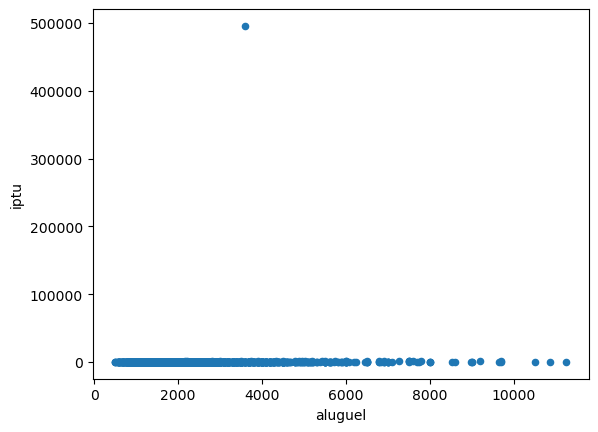

In [219]:
# Criando um scatterplot do preço com aluguel e iptu
base2.plot.scatter(x='aluguel', y='iptu');

In [220]:
base2.iptu.max()

495800.0

In [221]:
base2[base2['iptu'] == 495800.0]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1188,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


Existe um valor de iptu muito acima dos outros, podendo ser um erro.

In [222]:
verificando = pd.read_csv('data/quinto_andar_transformed_data.csv')
verificando[verificando['iptu'] > 400000]['url']

1707    https://www.quintoandar.com.br/imovel/89337922...
Name: url, dtype: object

O real valor desse iptu é 495,00

In [223]:
# Corrigindo o valor do iptu
base2.loc[base2.total == base.total.max(), 'iptu'] = 495.8

In [224]:
# Atualizando a coluna TOtal
base2.loc[base2.total == base2.total.max(), 'total'] = 4227

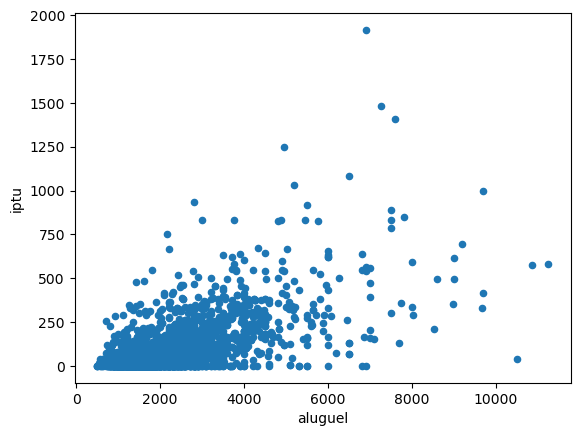

In [225]:
base2.plot.scatter(x='aluguel', y='iptu');

### Tratamento dos dados

In [226]:
# Verificando o % da taxa de serviço com o valor do aluguel
round((base2.taxa_serviço/base2.aluguel)*100,2)

0       2.00
1       1.96
2       2.00
3       2.00
4       2.00
        ... 
2229    2.00
2230    1.96
2231    2.00
2232    2.00
2233    1.98
Length: 2234, dtype: float64

Verificando o site do quintoAndar encontramos que a taxa de serviço E o seguro incêndio são valores criados com base no preço do aluguel.<br>
Portanto não podemos usá-las para prever o valor do aluguel, pois elas mesmas são criadas com base no valor do aluguel.

In [227]:
# Removendo as colunas que tem dependencia do valor do aluguel
base2 = base2.drop(['taxa_serviço', 'seguro_incendio', 'total'], axis=1)

In [228]:
base2.head()

,bairro,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro
3,Ipiranga,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Ipiranga,Sul
4,Vila Olímpia,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Vila Olímpia,Sul


In [229]:
# Removendo a coluna duplicada bairro
base2 = base2.drop('bairro', axis=1)

Transformando as informações das regiões em valores numéricos, usando get dummies

In [230]:
pd.get_dummies(base2.Região)

,Centro,Leste,Norte,Oeste,Sul
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2229,1,0,0,0,0
2230,1,0,0,0,0
2231,0,1,0,0,0
2232,1,0,0,0,0


In [231]:
# Concatenando os dois data frames, e voltando a usar a variavel base e não base2
base = pd.concat([base2, pd.get_dummies(base2.Região)], axis=1)

In [232]:
# Ficando apenas com valores numericos
base = base.drop(["Bairro", "Região"], axis=1)
base.head()

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,0,1,0,0,0
1,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,1,0,0,0,0
2,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
3,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1
4,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,0,0,0,0,1


### Definição do modelo

Usaremos um modelo de Regressão pois queremos prever valores númericos contínuos, e não classificar em grupos.

In [233]:
# Separando os dados em X e y

X = base.drop('aluguel', axis=1)
y = base.aluguel

In [234]:
# Importando train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [248]:
# Importando a Regressão Linear
from sklearn.linear_model import LinearRegression

In [249]:
# Criando o modelo e treinando e treinando com os dados de treino
reg = LinearRegression().fit(X_train, y_train)

In [250]:
# Fazendo a previsão com os dados de teste
pred_reg = reg.predict(X_test)

In [251]:
# Avaliando o modelo

# Importando o erro medio absoluto para avaliar as previsões do modelo
from sklearn.metrics import mean_absolute_error

In [252]:
# Quanto menor o valor melhor
mean_absolute_error(y_test, pred_reg)

538.1964404858859

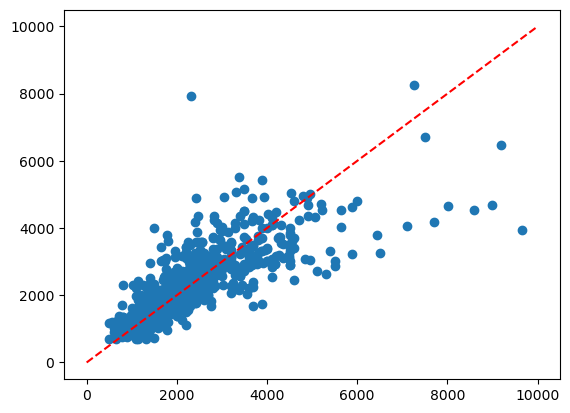

In [254]:
# Visualizando gráficamente com scatterplot
fig, ax = plt.subplots()
ax.scatter(y_test, pred_reg)

ax.plot([0, 10000], [0, 10000], '--r')
plt.show()

In [247]:
# Criando modelo com arvore de decisao
from sklearn.tree import DecisionTreeRegressor

In [255]:
# Criando modelo com a arvore
arvore = DecisionTreeRegressor().fit(X_train, y_train)

In [256]:
# Prevendo valores com a arvore de regressao
pred_arvore = arvore.predict(X_test)

In [257]:
# Avaliando erro da arvore de regressao
mean_absolute_error(y_test, pred_arvore)

672.6937669376694

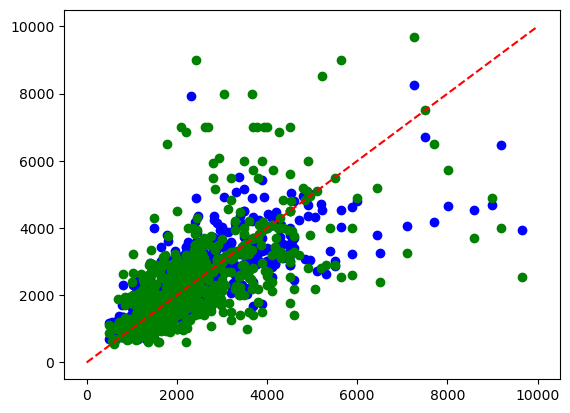

In [262]:
# Visualizando gráficamente a Regressão e a árvore

fig, ax = plt.subplots()
ax.scatter(y_test, pred_reg, color='blue')

ax.scatter(y_test, pred_arvore, color='green')

ax.plot([0, 10000], [0, 10000], '--r')
plt.show()